# Digit Recognizer kaggle competition

# Description

In [1]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import random
from IPython.core.display import display, HTML


display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!ls

README.md                     result_cnn_normalized_sgd.csv
digit_recognition_ml.ipynb    test.csv
keras_dl.ipynb                titanic_train.ipynb
result_cnn.csv                train.csv
result_cnn_normalized.csv


In [3]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

# 0- Short data previzualisation

In [5]:
df.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df = df.sample(10000)
y = train_df["label"]
train_df.drop(columns="label", inplace=True)

In [8]:
y.shape, train_df.shape

((10000,), (10000, 784))

In [9]:
x_train, x_test , y_train, y_test = train_test_split(train_df, y, random_state=0)

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train

1331     2
2055     2
35591    6
23630    9
40718    4
        ..
86       9
17882    3
26812    0
26309    1
39484    6
Name: label, Length: 7500, dtype: int64

In [12]:
x_train.shape[1] , x_test.shape, 

(784, (2500, 784))

In [13]:
x_train.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  16, 198, 248, 248, 248, 248,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

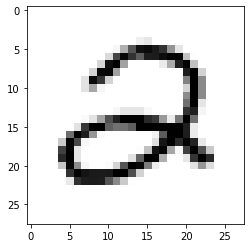

In [14]:
ximagelist = x_train.iloc[1].values.reshape(28, 28)
im = plt.imshow(ximagelist, cmap='Greys')
plt.show()

KeyError: 538

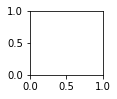

In [15]:
#for i in range(0,3):
#    for j in range(0,4):
#        index = random.randrange(0, x_train.shape[1])
#        plot = plt.subplot2grid((3, 4), (i, j))
#        plot.imshow(x_train[index].reshape(28,28))

#plt.tight_layout()
#plt.show()

# 1- KNN model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
y_df = df.label

In [17]:
df.drop(columns="label", inplace=True)

In [20]:
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(df,y_df, random_state=0)
knc = KNeighborsClassifier().fit(x_df_train,y_df_train)

In [21]:
knc.score(x_df_test, y_df_test)

0.9667619047619047

In [22]:
!ls

README.md                     result_cnn_normalized_sgd.csv
digit_recognition_ml.ipynb    test.csv
keras_dl.ipynb                titanic_train.ipynb
result_cnn.csv                train.csv
result_cnn_normalized.csv


In [23]:
test_df = pd.read_csv("test.csv")

In [24]:
test_df.shape

(28000, 784)

In [ ]:
pred = knc.predict(test_df)

In [50]:
result_df = pd.DataFrame({"ImageId":np.arange(1, len(pred)+1),
                          "Label":pred})

In [51]:
result_df.to_csv("result_1.csv", index=False)

# 2 - KNN with PCA analysis, Normalization, grid search and pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [37]:
grid = {"pca__n_components":[30, 40, 50], "kneighborsclassifier__n_neighbors":[3,5, 6]}
pipe_pca = make_pipeline(PCA(), StandardScaler(), KNeighborsClassifier())
gs = GridSearchCV(pipe_pca, param_grid=grid).fit(df,y_df)

/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
gs.best_params_

{'kneighborsclassifier__n_neighbors': 3, 'pca__n_components': 30}

In [39]:
gs.best_score_

0.9651666666666666

In [ ]:
pd.DataFrame(gs.cv_results_)

In [ ]:
gs.predict(x_train)

# 3- SVC with PCA analysis, Normalization, grid search and pipeline

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), PCA(), SVC())

In [ ]:
{'pca__n_components': 20, 'svc__C': 10, 'svc__gamma': 0.01}

In [81]:
scaler = StandardScaler().fit(x_df_train)
x_df_train_sc = scaler.transform(x_df_train)
x_df_test_sc = scaler.transform(x_df_test)

In [82]:
#svc = SVC(C=10, gamma=0.01).fit(x_df_train_sc, y_df_train)
#svc.score(x_df_train_sc, y_df_train), svc.score(x_df_test_sc, y_df_test)

(1.0, 0.836952380952381)

In [83]:
#pca = PCA(n_components=30)


In [84]:
#x_train_pca = pca.fit_transform(x_df_train)
#x_test_pca = pca.transform(x_df_test)
#scaler = StandardScaler().fit(x_train_pca)
#x_df_train_pca_sc = scaler.transform(x_train_pca)
#x_df_test_pca_sc = scaler.transform(x_test_pca)

In [85]:
#svc = SVC(C=10, gamma=0.01).fit(x_df_train_pca_sc, y_df_train)
#svc.score(x_df_train_pca_sc, y_df_train), svc.score(x_df_test_pca_sc, y_df_test)

(0.9904444444444445, 0.9760952380952381)

In [22]:
pipe = make_pipeline(PCA(), StandardScaler(), SVC())
#grid = {"pca__n_components": [20, 50, 100, 200], "svc__C": [ 0.01, 0.1, 1, 10], "svc__gamma": [0.01, 0.1, 1, 10]}
grid = {"pca__n_components": [20], "svc__C": [ 0.01, 0.1, 1, 10], "svc__gamma": [0.01, 0.1, 1, 10]}

In [23]:
gs = GridSearchCV(pipe, param_grid=grid).fit(df,y_df)

/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
gs.best_params_

{'pca__n_components': 20, 'svc__C': 10, 'svc__gamma': 0.1}

In [25]:
gs.best_score_

0.9754761904761905

# 4- Logistic Regression with PCA analysis, Normalization, grid search and pipeline

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
pipe_lr = make_pipeline(StandardScaler(), PCA(), LogisticRegression())

In [60]:
grid_lr = {"pca__n_components": [20, 50 , 100, 200], "logisticregression__C":[0.01, 0.1, 1, 10]}
gs_ls = GridSearchCV(pipe_lr, param_grid=grid_lr).fit(x_train,y_train)

In [62]:
gs_ls.best_params_

{'logisticregression__C': 10, 'pca__n_components': 100}

In [63]:
gs_ls.best_score_

0.892

# 5- Kaggle Test Data

In [39]:
test_df = pd.read_csv("test.csv")

In [40]:
!head  test.csv

In [41]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_df.shape

(28000, 784)

In [44]:
y_test = gs.predict(test_df)

In [52]:
result_df = pd.DataFrame({"ImageId":np.arange(1, len(y_test)+1),
                          "Label":y_test})

In [56]:
result_df.to_csv("result_0.csv", index=False)

In [57]:
!head result_0.csv

ImageId,Label
1,2
2,0
3,9
4,4
5,3
6,7
7,0
8,3
9,0


In [49]:
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
len(np.arange(1, len(y_test)+1))

27999

In [46]:
test_df.index

RangeIndex(start=0, stop=28000, step=1)

# 6- Experimentations

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log_reg = LogisticRegression().fit(x_train, y_train)

/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [78]:
log_reg.score(x_train, y_train), log_reg.score(x_test, y_test)

(0.9950666666666667, 0.8528)

In [106]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), ("log_reg", LogisticRegression())])
grid = {"pca__n_components": [10, 20, 40, 100, 200, 400, 600]}
gs = GridSearchCV(pipe, param_grid=grid, cv=5)

NameError: name 'StandardScaler' is not defined

In [110]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=Fa

In [113]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [111]:
gs.best_params_

{'pca__n_components': 100}

In [112]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.432681,0.003504,0.017983,0.000919,10,{'pca__n_components': 10},0.780731,0.764314,0.784523,0.777036,0.765374,0.774400,0.008157,7
1,0.575173,0.007803,0.017551,0.000305,20,{'pca__n_components': 20},0.856478,0.844208,0.849900,0.852470,0.840909,0.848800,0.005604,6
2,0.926776,0.025135,0.018468,0.000935,40,{'pca__n_components': 40},0.887043,0.876831,0.881921,0.882510,0.881684,0.882000,0.003245,3
3,4.914759,0.300889,0.020034,0.001964,100,{'pca__n_components': 100},0.899003,0.907457,0.893929,0.895194,0.888369,0.896800,0.006329,1
4,9.297941,0.368015,0.017804,0.000457,200,{'pca__n_components': 200},0.900332,0.895473,0.897932,0.891188,0.889706,0.894933,0.003995,2
5,16.609926,0.164022,0.028420,0.002580,400,{'pca__n_components': 400},0.890365,0.883489,0.878586,0.875834,0.879679,0.881600,0.005032,4
6,24.931708,0.801809,0.038581,0.006066,600,{'pca__n_components': 600},0.878405,0.872170,0.867912,0.871162,0.856283,0.869200,0.007290,5


In [95]:
pipe.fit(x_train, y_train)

/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [96]:
pipe.score(x_train, y_train), pipe.score(x_test, y_test)

(0.9786666666666667, 0.8732)

In [79]:
from sklearn.preprocessing import StandardScaler
standard_scaler =StandardScaler().fit(x_train) 
x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200).fit(x_train_scaled)
principal_comp_train = pca.transform(x_train_scaled)
principal_comp_test = pca.transform(x_test_scaled)

In [88]:
principal_comp_train.shape, principal_comp_test.shape

((7500, 200), (2500, 200))

In [89]:
principalTrainDf = pd.DataFrame(principal_comp_train)
principalTestDf = pd.DataFrame(principal_comp_test)


In [90]:
principalTrainDf.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,9.667699,4.933211,10.880404,-0.721864,9.361000,-0.682447,-4.741331,-5.774118,1.291435,5.095935,...,0.794548,-0.263336,0.180582,0.114826,-0.508748,-1.654876,0.563621,0.870385,-0.686470,0.215862
1,5.019712,-11.128695,-2.951664,8.311209,-3.496508,1.919891,6.260634,3.636337,-0.107336,-1.660542,...,-0.212727,-0.581261,-0.449313,-1.015921,0.742458,-0.877955,0.398122,0.922725,0.680789,0.900590
2,2.284885,5.437254,2.739436,3.394647,-2.802393,-5.402228,0.447200,-6.968382,-0.321984,1.497045,...,-0.432325,0.441514,-1.029190,0.053768,0.623305,-0.498225,0.503955,0.407474,-0.053887,0.229729
3,0.141386,-7.181303,-7.127540,4.591866,2.287674,-0.544651,-0.369087,1.238485,5.947648,2.993577,...,0.135392,-0.243550,0.943935,0.479816,-0.072385,-1.210147,-0.352772,1.189343,1.200791,0.176456
4,17.060131,11.307745,1.658508,-4.902467,8.742997,6.236273,5.837843,-5.997138,6.110902,2.307892,...,-0.121553,-0.562645,-0.807533,1.176741,1.138424,-1.957600,-1.370289,-0.583863,-1.321590,-0.199546


In [91]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(principalTrainDf, y_train)

/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
log_reg_pca.score(principalTrainDf, y_train), log_reg_pca.score(principalTestDf, y_test)

(0.9386666666666666, 0.8964)